# Intensity distribution

In this notebook we conduct measurements with the photodiode and different constellations of the acousto-optic deflectors.

Thorlabs photodiode is set to 50dB.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl

datadir = '../../dataset/intensity'
figuredir = '../../figure/intensity/distribution'

from matplotlib import pyplot as plt

cmap = plt.get_cmap('tab20c')

T = 26e-3
f0 = 80e6
f1 = 120e6

os.makedirs(figuredir, exist_ok=True)

In [2]:
def to_intensity_matrix(df):
    df = df[(df.time > 0) & (df.time < T)]
    df['frequency'] = f0 + (f1 - f0) * df.time / (df.time.max() - df.time.min())

    U = [float(c.split('@')[-1]) for c in df.columns if c.startswith('voltage')]
    M = df[[c for c in df.columns if c.startswith('voltage')]].values
    
    return df.frequency.values, np.array(U), M

def to_intensity_matrix2(df):
    df = df[(df.time > 0) & (df.time < 260e-3)]
    df['frequency'] = f0 + (f1 - f0) * df.time / (df.time.max() - df.time.min())

    U = [float(c.split('@')[-1].split('%')[0]) for c in df.columns if c.startswith('voltage')]
    M = df[[c for c in df.columns if c.startswith('voltage')]].values
    
    return df.frequency.values, np.array(U), M

def to_intensity_matrix3(df):
    df = df[(df.time > 0) & (df.time < 260e-3)]
    df['frequency'] = f0 + (f1 - f0) * df.time / (df.time.max() - df.time.min())

    U = [float(c.split('@')[-1].split('MHz')[0])*1e6 for c in df.columns if c.startswith('voltage')]
    M = df[[c for c in df.columns if c.startswith('voltage')]].values
    
    return df.frequency.values, np.array(U), M

In [3]:
hh = pd.read_hdf(os.path.join(datadir, 'unpaired-amplitude.h5'), 'horizontal_element_horizontal_socket')
hv = pd.read_hdf(os.path.join(datadir, 'unpaired-amplitude.h5'), 'horizontal_element_vertical_socket')
vh = pd.read_hdf(os.path.join(datadir, 'unpaired-amplitude.h5'), 'vertical_element_horizontal_socket')
vv = pd.read_hdf(os.path.join(datadir, 'unpaired-amplitude.h5'), 'vertical_element_vertical_socket')

hh_f, hh_U, hh_I = to_intensity_matrix(hh)
hv_f, hv_U, hv_I = to_intensity_matrix(hv)
vv_f, vv_U, vv_I = to_intensity_matrix(vv)
vh_f, vh_U, vh_I = to_intensity_matrix(vh)

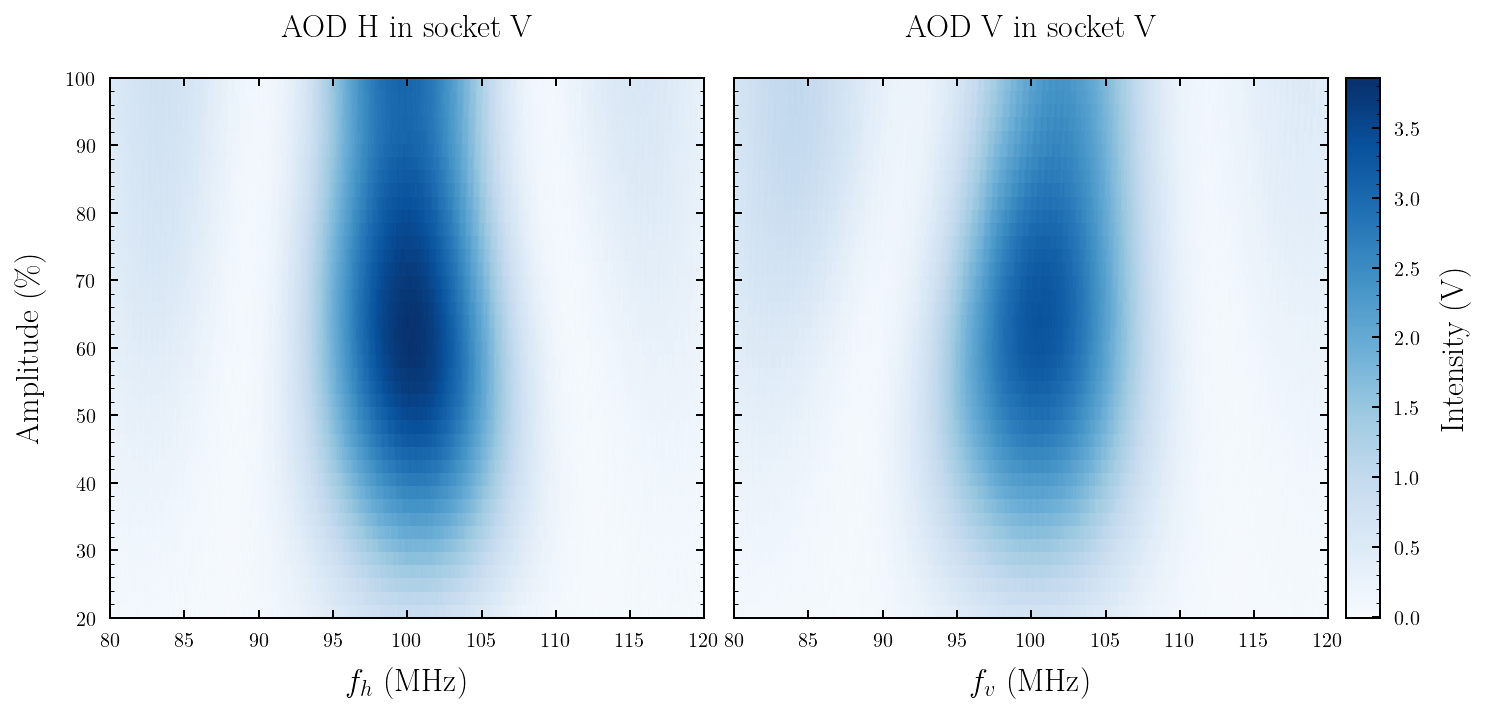

In [28]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)

vmin = np.min([hv_I.min(), vv_I.min()])
vmax = np.max([hv_I.max(), vv_I.max()])

axes[0].set_title('AOD H in socket V')
axes[0].set_xlabel('$f_h$ (\si{\mega\hertz})')
axes[0].set_ylabel('Amplitude (\si{\percent})')
axes[0].imshow(np.rot90(hv_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[hv_f.min() / 1e6, hv_f.max() / 1e6, hv_U.min() * 1e2, hv_U.max()  * 1e2])

axes[1].set_title('AOD V in socket V')
axes[1].set_xlabel('$f_v$ (\si{\mega\hertz})')
im = axes[1].imshow(np.rot90(vv_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[vv_f.min() / 1e6, vv_f.max() / 1e6, vv_U.min() * 1e2, vv_U.max() * 1e2])

plt.subplots_adjust(top=.9, bottom=.15, hspace=.05, wspace=.05, right=.83)
plt.colorbar(im, label=r'Intensity (\si{\volt})', cax=plt.axes([0.84, 0.15, 0.02, .75]))
plt.savefig(os.path.join(figuredir, 'unpaired-amplitude.pgf'))
plt.savefig(os.path.join(figuredir, 'unpaired-amplitude.pdf'))
plt.show()

In [20]:
a_hsweep = pd.read_hdf(os.path.join(datadir, 'anticipated-amplitude.h5'), 'hsweep')
a_vsweep = pd.read_hdf(os.path.join(datadir, 'anticipated-amplitude.h5'), 'vsweep')

a_hsweep_ex = pd.read_hdf(os.path.join(datadir, 'exchanged-amplitude.h5'), 'hsweep')
a_vsweep_ex = pd.read_hdf(os.path.join(datadir, 'exchanged-amplitude.h5'), 'vsweep')

ah_f, ah_U, ah_I = to_intensity_matrix2(a_hsweep)
av_f, av_U, av_I = to_intensity_matrix2(a_vsweep)
aeh_f, aeh_U, aeh_I = to_intensity_matrix2(a_hsweep_ex)
aev_f, aev_U, aev_I = to_intensity_matrix2(a_vsweep_ex)

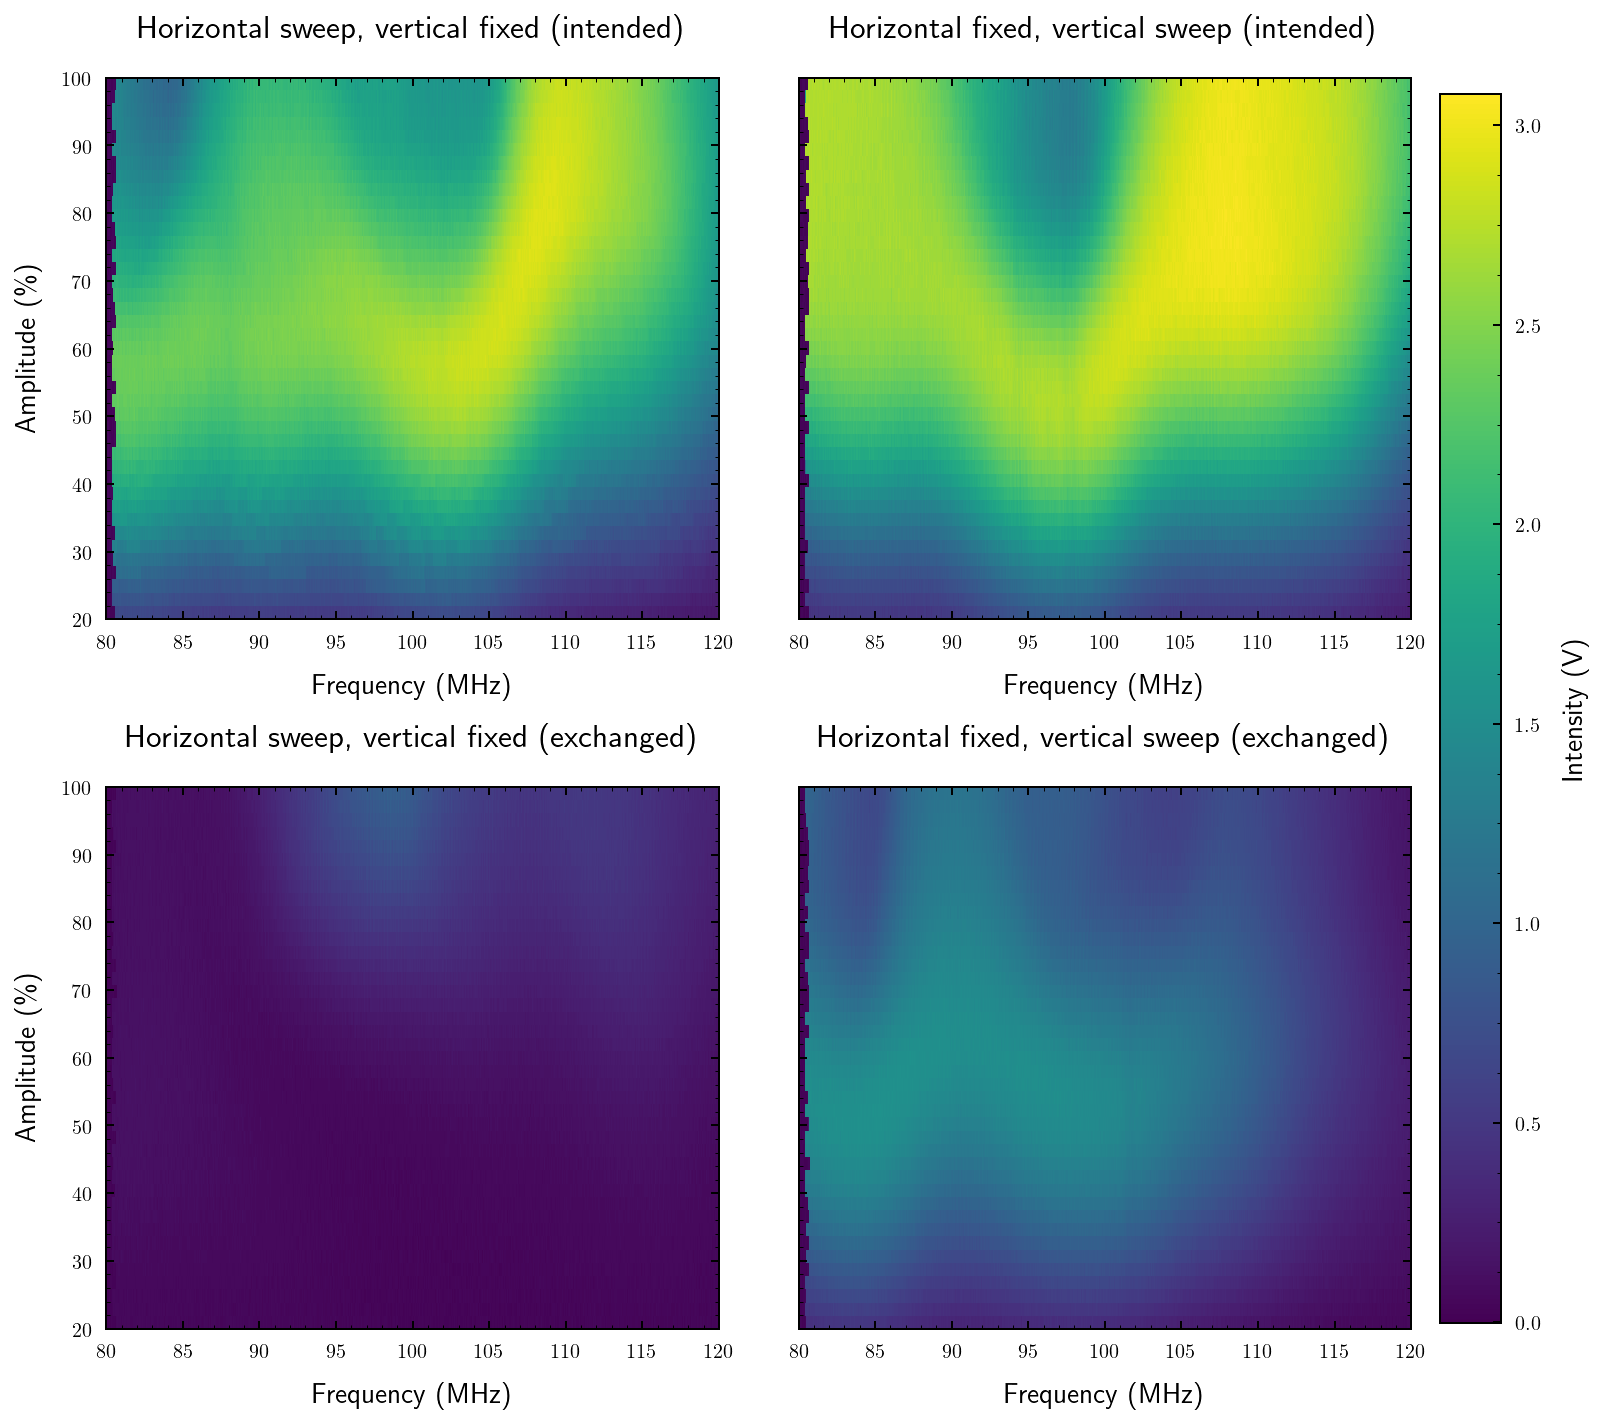

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharey=True)

vmin = np.min([ah_I.min(), av_I.min(), aeh_I.min(), aev_I.min()])
vmax = np.max([ah_I.max(), av_I.max(), aeh_I.max(), aev_I.max()])

axes = axes.flatten()

axes[0].set_title('Horizontal sweep, vertical fixed (intended)')
axes[0].set_xlabel('Frequency (MHz)')
axes[0].set_ylabel('Amplitude (\%)')
axes[0].imshow(np.rot90(ah_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[ah_f.min() / 1e6, ah_f.max() / 1e6, ah_U.min() * 1e2, ah_U.max() * 1e2])

axes[1].set_title('Horizontal fixed, vertical sweep (intended)')
axes[1].set_xlabel('Frequency (MHz)')
axes[1].imshow(np.rot90(av_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[av_f.min() / 1e6, av_f.max() / 1e6, av_U.min() * 1e2, av_U.max() * 1e2])

axes[2].set_title('Horizontal sweep, vertical fixed (exchanged)')
axes[2].set_xlabel('Frequency (MHz)')
axes[2].set_ylabel('Amplitude (\%)')
axes[2].imshow(np.rot90(aeh_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[aeh_f.min() / 1e6, aeh_f.max() / 1e6, aeh_U.min() * 1e2, aeh_U.max() * 1e2])

axes[3].set_title('Horizontal fixed, vertical sweep (exchanged)')
axes[3].set_xlabel('Frequency (MHz)')
im = axes[3].imshow(np.rot90(aev_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[aev_f.min() / 1e6, aev_f.max() / 1e6, aev_U.min() * 1e2, aev_U.max() * 1e2])

fig.subplots_adjust(right=1.16)
fig.colorbar(im, ax=list(axes), label='Intensity (V)', shrink=1.13)
fig.tight_layout()
#fig.savefig(os.path.join(figuredir, 'paired-amplitude.pdf'))

plt.show()

In [21]:
ra = pd.read_csv('../../dataset/intensity/sample-frequency.csv')

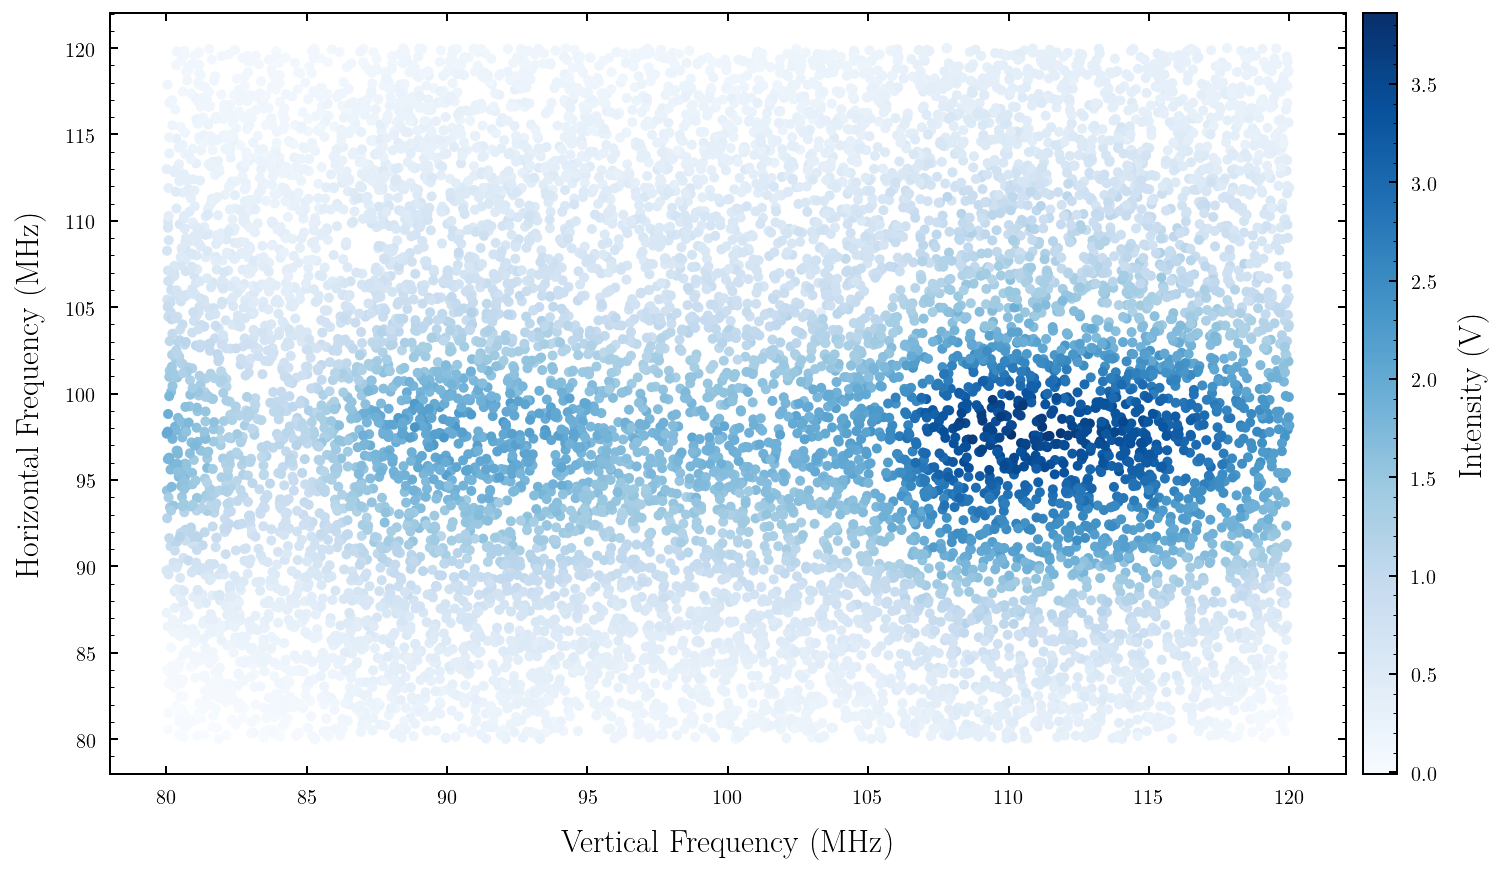

In [29]:
plt.figure(figsize=(12, 6))
plt.scatter(ra.hfrequency / 1e6, ra.vfrequency / 1e6, c=ra.voltage, cmap='Blues')
plt.xlabel('Vertical Frequency (\si{\mega\hertz})')
plt.ylabel('Horizontal Frequency (\si{\mega\hertz})')

plt.subplots_adjust(top=.98, bottom=.1, right=.84)
plt.colorbar(im, label=r'Intensity (\si{\volt})', cax=plt.axes([0.85, 0.1, 0.02, .88]))
plt.savefig(os.path.join(figuredir, 'sample-frequency.pgf'))
plt.savefig(os.path.join(figuredir, 'sample-frequency.pdf'))
plt.show()

In [31]:
f_hsweep = pd.read_hdf(os.path.join(datadir, 'anticipated-frequency.h5'), 'hsweep')
f_vsweep = pd.read_hdf(os.path.join(datadir, 'anticipated-frequency.h5'), 'vsweep')

fh_f, fh_U, fh_I = to_intensity_matrix3(f_hsweep)
fv_f, fv_U, fv_I = to_intensity_matrix3(f_vsweep)

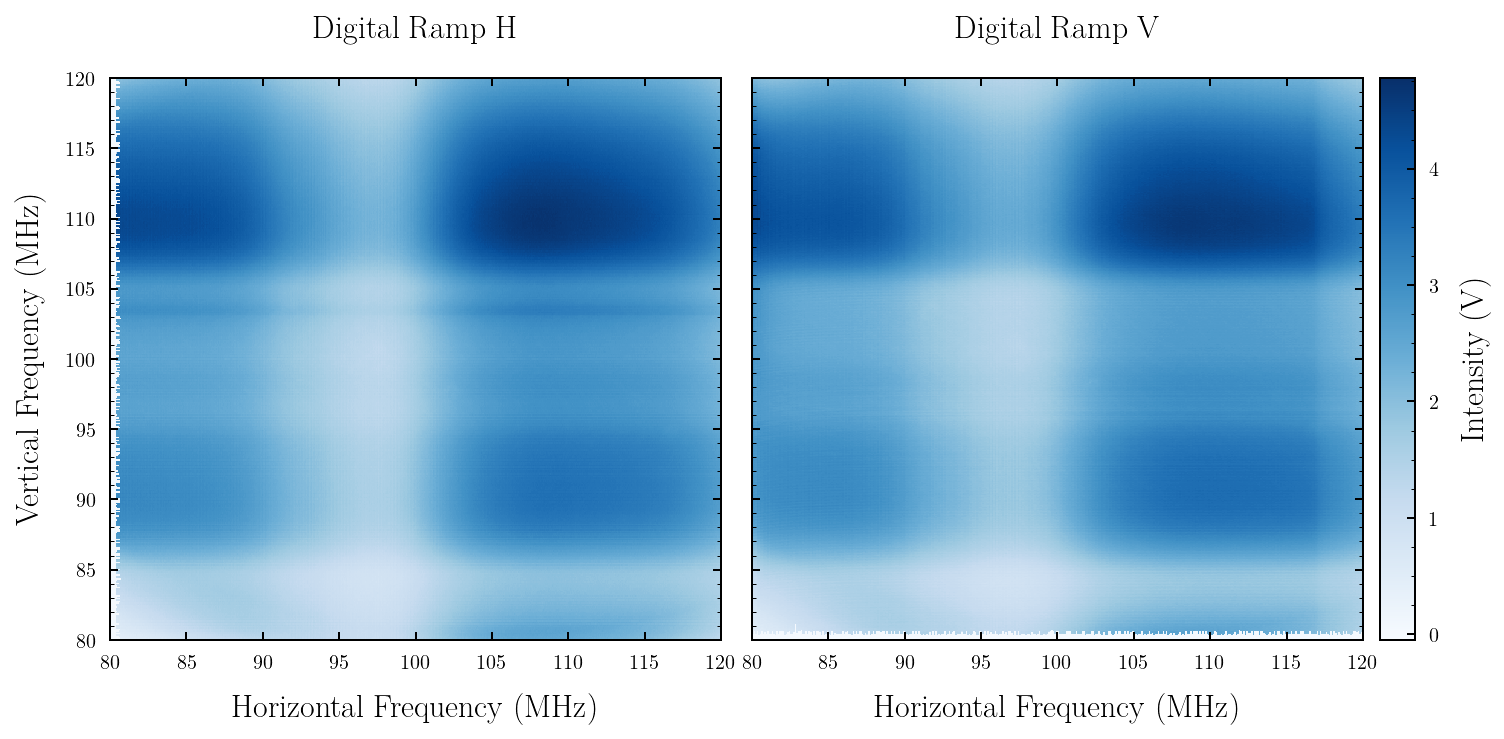

In [59]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)

vmin = np.min([fh_I.min(), fv_I.min()])
vmax = np.max([fh_I.max(), fv_I.max()])

axes[0].set_title('Digital Ramp H')
axes[0].set_xlabel('Horizontal Frequency (\si{\mega\hertz})')
axes[0].set_ylabel('Vertical Frequency (\si{\mega\hertz})')
axes[0].imshow(np.rot90(fh_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[fh_f.min() / 1e6, fh_f.max() / 1e6, fh_U.min() / 1e6, fh_U.max() / 1e6])

axes[1].set_title('Digital Ramp V')
axes[1].set_xlabel('Horizontal Frequency (\si{\mega\hertz})')
im = axes[1].imshow(np.flipud(fv_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[fv_f.min() / 1e6, fv_f.max() / 1e6, fv_U.min() / 1e6, fv_U.max() / 1e6])

plt.subplots_adjust(top=.9, bottom=.12, wspace=.05, right=.85)
plt.colorbar(im, label=r'Intensity (\si{\volt})', cax=plt.axes([0.86, 0.12, 0.02, .78]))

plt.savefig(os.path.join(figuredir, 'paired-frequency.pgf'))
plt.savefig(os.path.join(figuredir, 'paired-frequency.pdf'))
plt.show()

In [40]:
from scipy import misc

X = misc.imresize(np.rot90(fh_I), (401, 401))
Y = misc.imresize(np.flipud(fv_I), (401, 401))

Z = np.abs(X-Y)

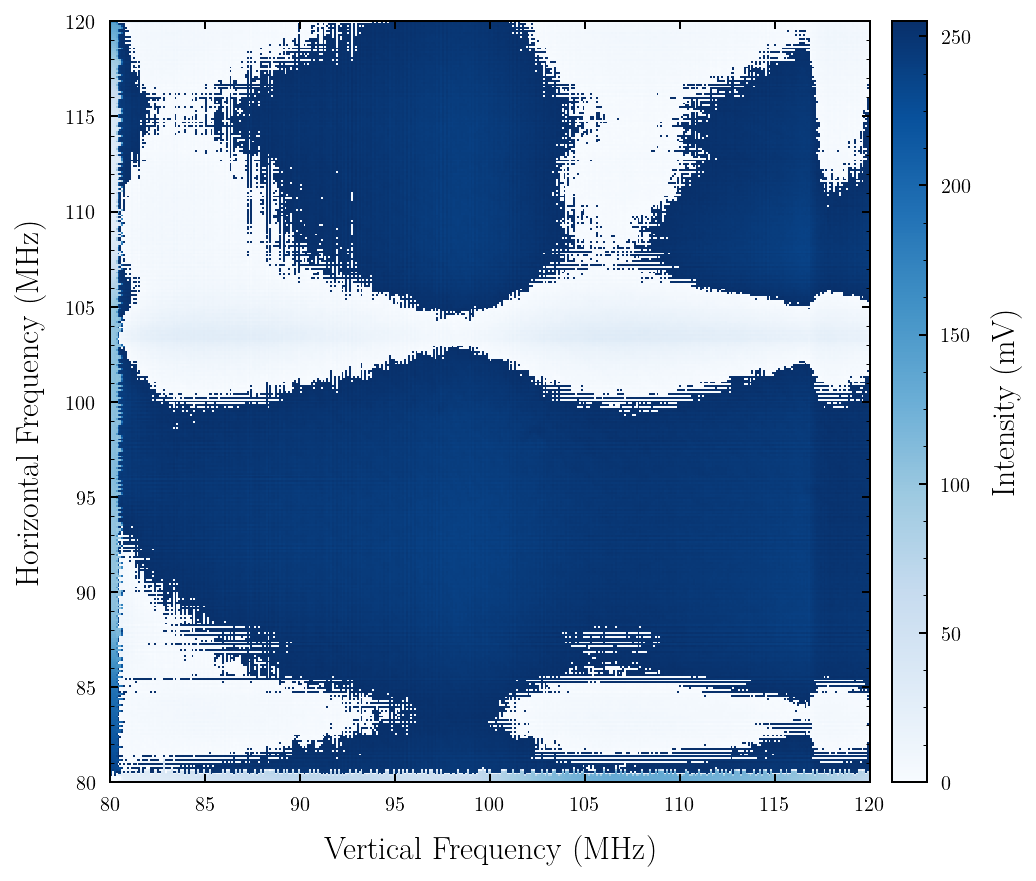

In [47]:
plt.figure(figsize=(12, 6))
plt.imshow(Z, extent=[80, 120, 80, 120])
plt.xlabel('Vertical Frequency (\si{\mega\hertz})')
plt.ylabel('Horizontal Frequency (\si{\mega\hertz})')

plt.subplots_adjust(top=.98, bottom=.1, right=.83)
plt.colorbar(label=r'Intensity (\si{\milli\volt})', cax=plt.axes([0.71, 0.1, 0.02, .88]))

plt.savefig(os.path.join(figuredir, 'paired-frequency-residue.pgf'))
plt.savefig(os.path.join(figuredir, 'paired-frequency-residue.pdf'))
plt.show()

In [48]:
dds = pd.read_hdf(os.path.join(datadir, 'signal-generator-dds.h5'), 'DDS')
gen = pd.read_hdf(os.path.join(datadir, 'signal-generator-gen.h5'), 'RS-SML02')

In [49]:
def preprocess(df):
    df = df[(df.time > 0) & (df.time < .8)]
    df['frequency'] = 80e6 + 40e6 * df.time / .8
    
    return df

In [50]:
dds_ = preprocess(dds)
gen_ = preprocess(gen)

gen_.head(3)

,time,voltage,frequency
6492,0.000003,0.219727,8.000015e+07
6493,0.000018,0.042991,8.000091e+07
6494,0.000034,0.028263,8.000168e+07


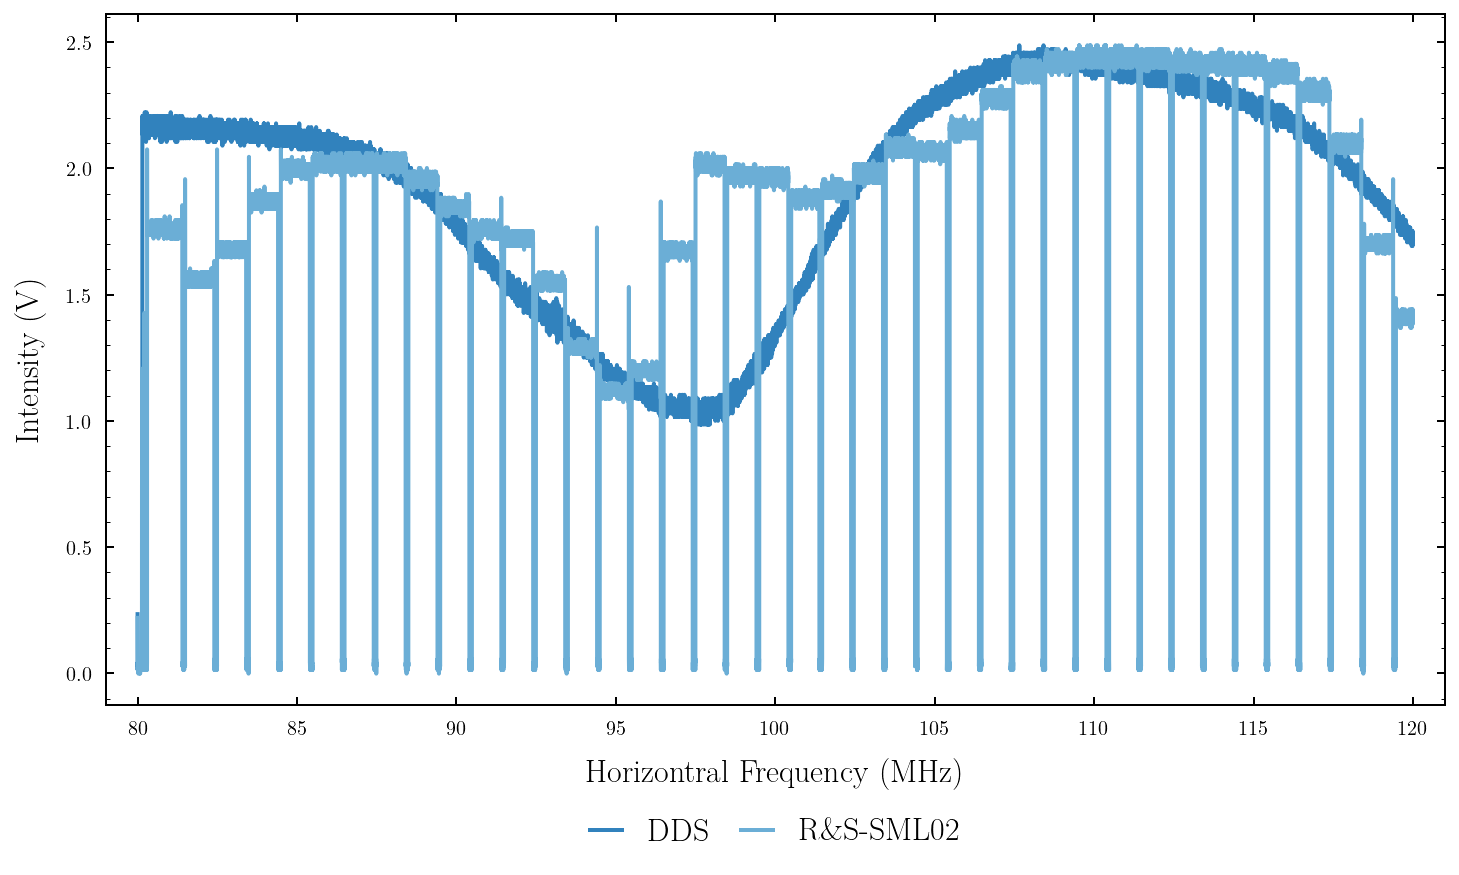

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(dds_.frequency / 1e6, dds_.voltage, label='DDS', color=cmap.colors[0])
plt.plot(gen_.frequency / 1e6, gen_.voltage, label='R\&S-SML02', color=cmap.colors[1])
plt.xlabel('Horizontral Frequency (\si{\mega\hertz})')
plt.ylabel(r'Intensity (\si{\volt})')
plt.xlim(79, 121)
plt.legend(loc='upper center', bbox_to_anchor=(.5, -0.12), ncol=2)

plt.subplots_adjust(top=.98, bottom=.18)
plt.savefig(os.path.join(figuredir, 'signal-sources.pgf'))
plt.savefig(os.path.join(figuredir, 'signal-sources.pdf'))
plt.show()

In [55]:
hc = pd.read_hdf(os.path.join(datadir, 'unpaired-angle.h5'), 'perp')
hl = pd.read_hdf(os.path.join(datadir, 'unpaired-angle.h5'), 'left')

hc_f, hc_A, hc_I = to_intensity_matrix2(hc)
hl_f, hl_A, hl_I = to_intensity_matrix2(hl)
#hr_f, hr_A, hr_I = to_intensity_matrix2(hr)

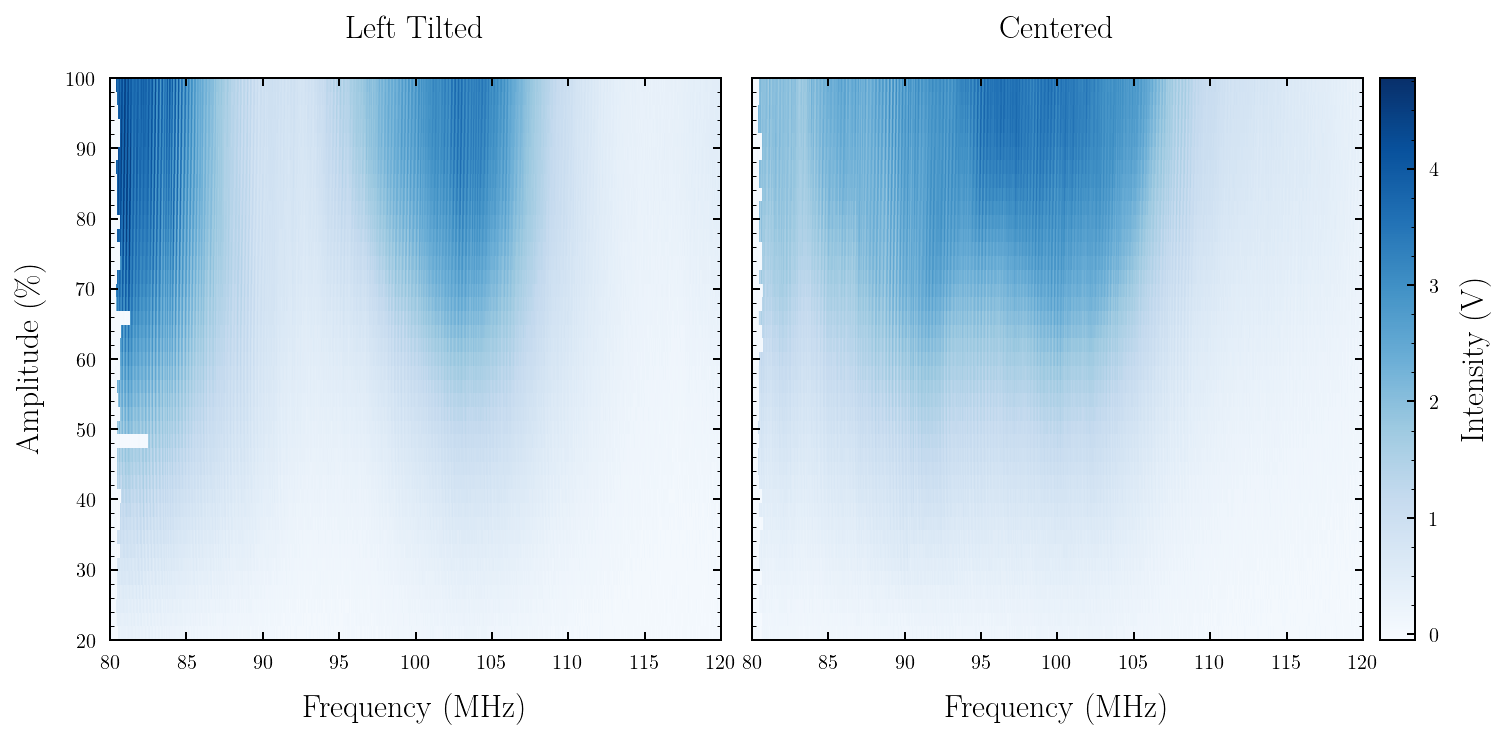

In [74]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)

vmin = np.min([hc_I.min(), hl_I.min()])
vmax = np.max([hc_I.max(), hl_I.max()])                  

axes[0].set_title('Left Tilted')
axes[0].set_xlabel('Frequency (\si{\mega\hertz})')
axes[0].set_ylabel('Amplitude (\si{\percent})')
axes[0].imshow(np.rot90(hl_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[hl_f.min() / 1e6, hl_f.max() / 1e6, hl_A.min() * 1e2, hl_A.max() * 1e2])

axes[1].set_title('Centered')
axes[1].set_xlabel('Frequency (\si{\mega\hertz})')
axes[1].imshow(np.rot90(hc_I), aspect='auto', vmin=vmin, vmax=vmax,
    extent=[hc_f.min() / 1e6, hc_f.max() / 1e6, hc_A.min() * 1e2, hc_A.max() * 1e2])


plt.subplots_adjust(top=.90, bottom=.12, wspace=.05, right=.85)
plt.colorbar(im, label=r'Intensity (\si{\volt})', cax=plt.axes([0.86, 0.12, 0.02, .78]))

fig.savefig(os.path.join(figuredir, 'unpaired-tilted.pgf'))
fig.savefig(os.path.join(figuredir, 'unpaired-tilted.pdf'))

plt.show()

In [61]:
ph250 = pd.read_hdf(os.path.join(datadir, 'unpaired-polarisation-h.h5'), '250')
ph260 = pd.read_hdf(os.path.join(datadir, 'unpaired-polarisation-h.h5'), '260')
ph270 = pd.read_hdf(os.path.join(datadir, 'unpaired-polarisation-h.h5'), '270')
ph280 = pd.read_hdf(os.path.join(datadir, 'unpaired-polarisation-h.h5'), '280')
ph290 = pd.read_hdf(os.path.join(datadir, 'unpaired-polarisation-h.h5'), '290')
ph300 = pd.read_hdf(os.path.join(datadir, 'unpaired-polarisation-h.h5'), '300')
ph310 = pd.read_hdf(os.path.join(datadir, 'unpaired-polarisation-h.h5'), '310')
ph320 = pd.read_hdf(os.path.join(datadir, 'unpaired-polarisation-h.h5'), '320')
ph330 = pd.read_hdf(os.path.join(datadir, 'unpaired-polarisation-h.h5'), '330')
ph340 = pd.read_hdf(os.path.join(datadir, 'unpaired-polarisation-h.h5'), '340')


ph = [ph250, ph260, ph270, ph280, ph290, ph300, ph310, ph320, ph330, ph340]
ph_p = [250, 260, 270, 280, 290, 300, 310, 320, 330, 340]
ph_f, ph_A, ph_I = zip(*[to_intensity_matrix2(p) for p in ph])

In [62]:
pv_p = [30, 40, 50, 60, 70, 80, 90, 100, 110]

pv = [pd.read_hdf(os.path.join(datadir, 'unpaired-polarisation-v.h5'), f'{p}') for p in pv_p]
pv_f, pv_A, pv_I = zip(*[to_intensity_matrix2(p) for p in pv])


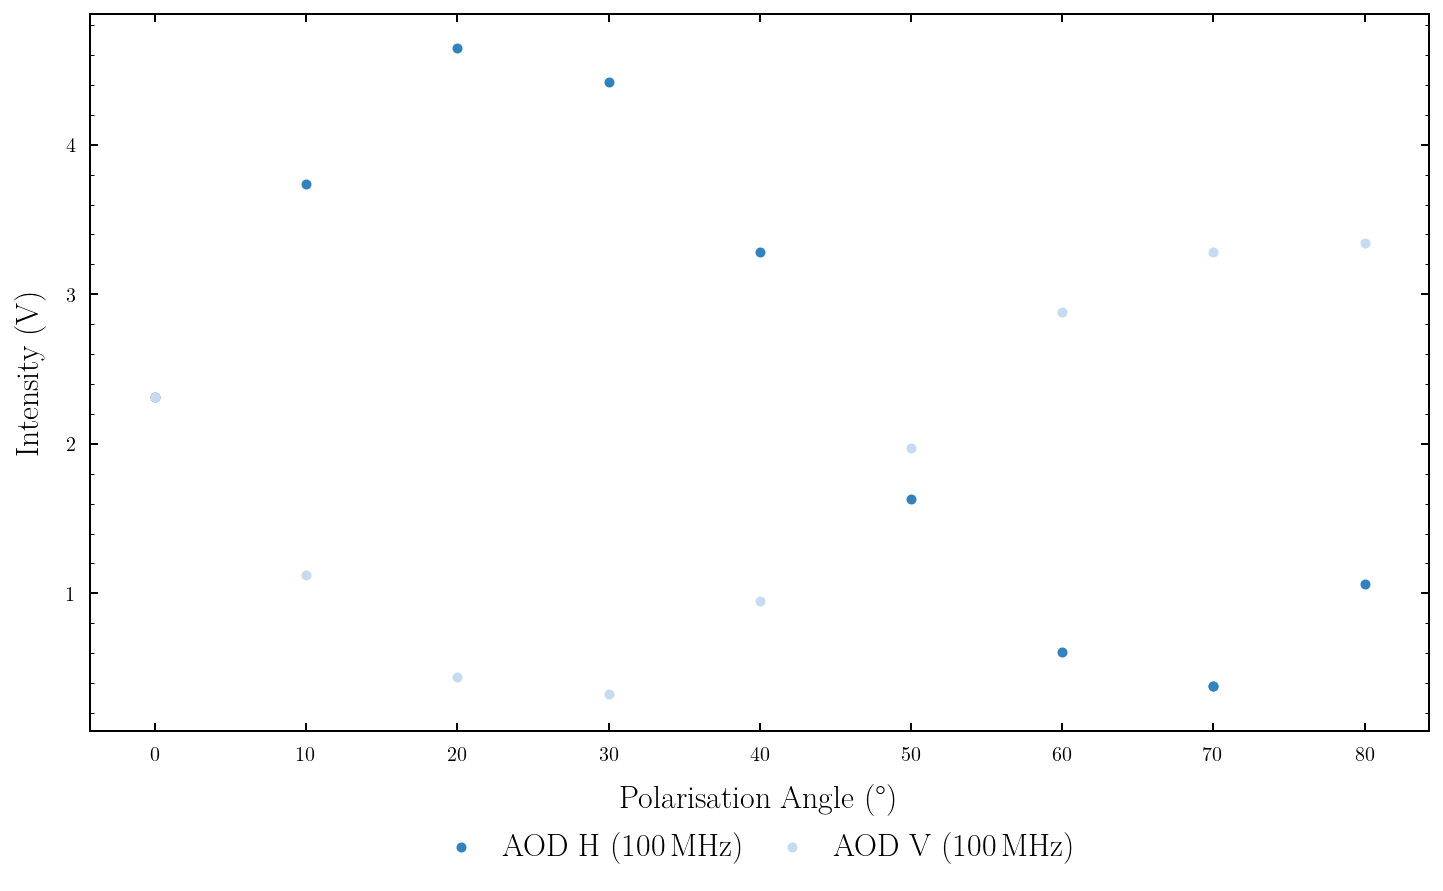

In [68]:
x = []
y = []

for i in range(len(ph_p)):
    x.append(ph_I[i][np.abs(ph_f[i] - 100e6).argmin(), -1])
    
for i in range(len(pv_p)):
    y.append(pv_I[i][np.abs(pv_f[i] - 100e6).argmin(), -1])

plt.figure(figsize=(12, 6))
plt.scatter(np.remainder(ph_p, 90), x, label=r'AOD H (\SI{100}{\mega\hertz})', color=cmap.colors[0])
plt.scatter(np.remainder(pv_p, 90), y, label=r'AOD V (\SI{100}{\mega\hertz})', color=cmap.colors[3])
plt.xlabel(r'Polarisation Angle (\si{\degree})')
plt.ylabel(r'Intensity (\si{\volt})')
plt.legend(loc='upper center', bbox_to_anchor=(.5, -0.1), ncol=2)

plt.subplots_adjust(top=.98, bottom=.15)
plt.savefig(os.path.join(figuredir, 'polarisation.pgf'))
plt.savefig(os.path.join(figuredir, 'polarisation.pdf'))
plt.show()

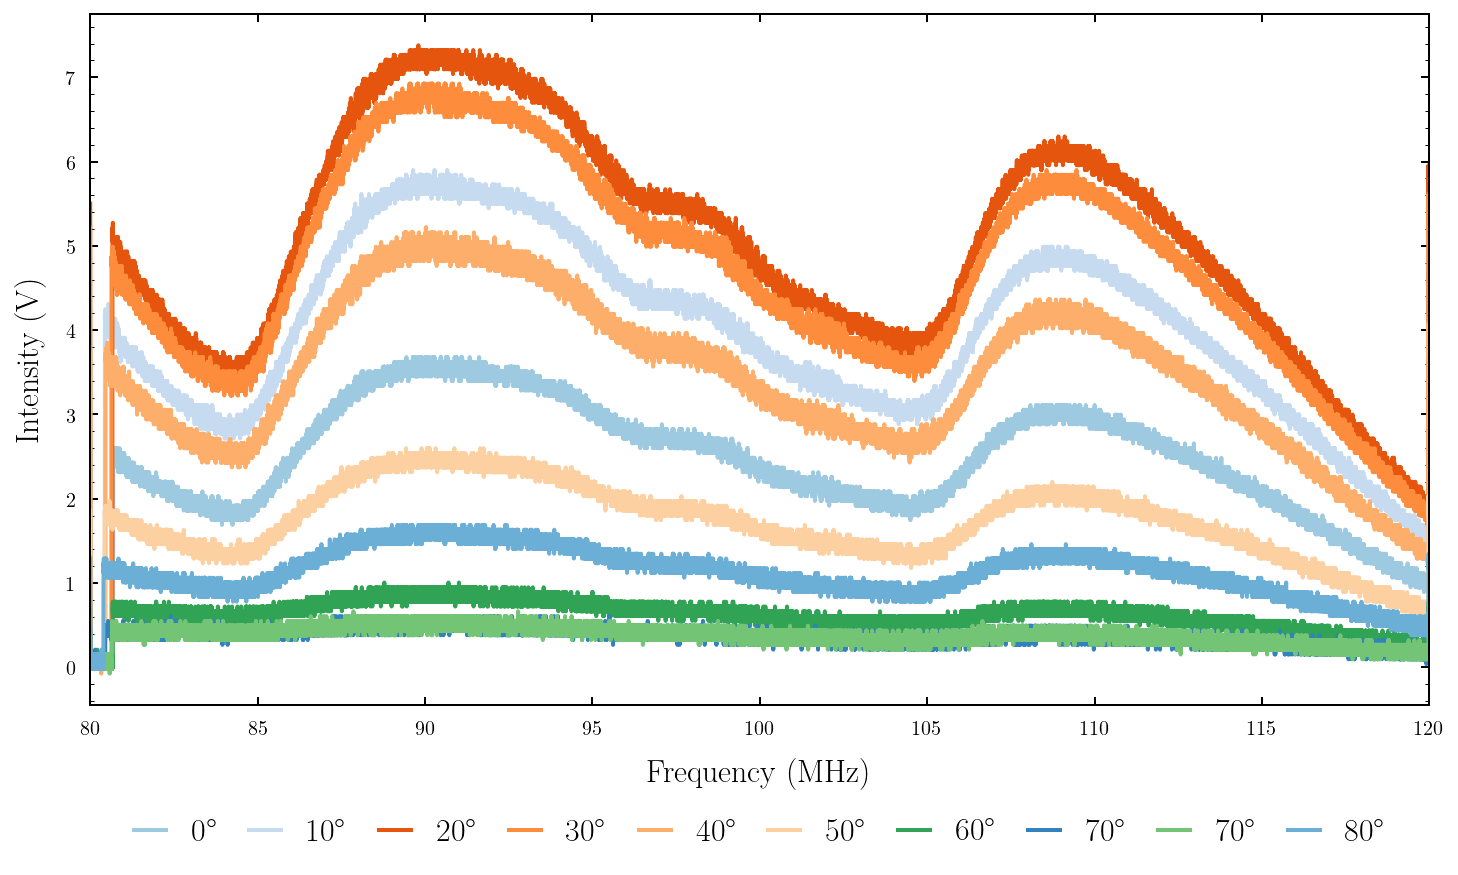

In [66]:
plt.figure(figsize=(12, 6))

for i, j in enumerate(np.remainder(ph_p, 90).argsort()):
    plt.plot(ph_f[j] / 1e6, ph_I[j][:,-1], label=r'\ang{%d}' % np.remainder(ph_p[j], 90), color=cmap.colors[j])

plt.xlim(80, 120)
plt.xlabel(r'Frequency (\si{\mega\hertz})')
plt.ylabel(r'Intensity (\si{\volt})')
plt.legend(loc='upper center', bbox_to_anchor=(.5, -0.12), ncol=10)
plt.subplots_adjust(top=.98, bottom=.18)
plt.savefig(os.path.join(figuredir, 'polarisation-horizontal.pgf'))
plt.savefig(os.path.join(figuredir, 'polarisation-horizontal.pdf'))
plt.show()

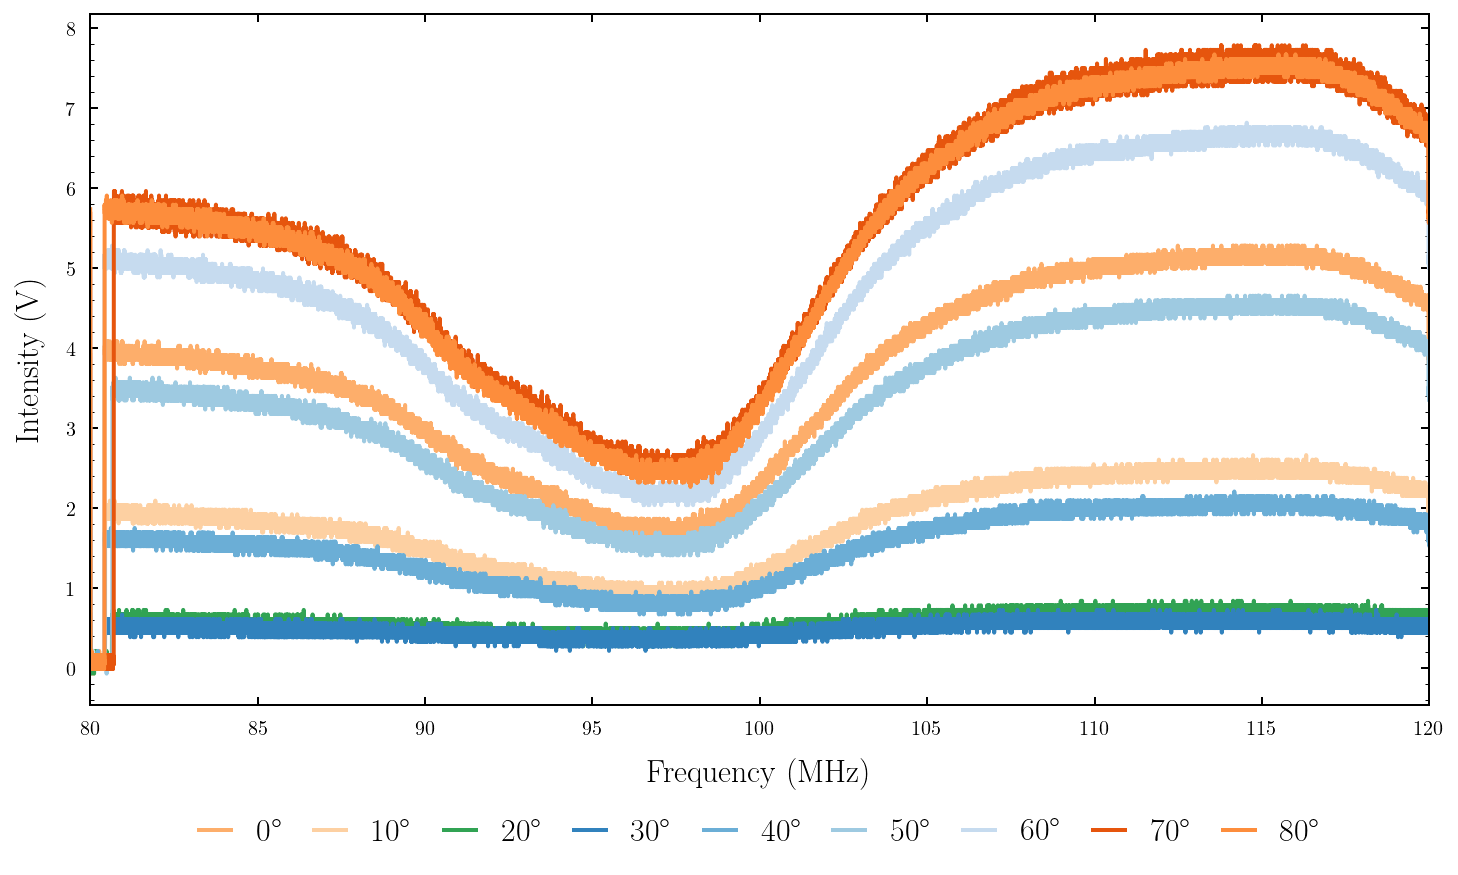

In [67]:
plt.figure(figsize=(12, 6))

for i, j in enumerate(np.remainder(pv_p, 90).argsort()):
    plt.plot(pv_f[j] / 1e6, pv_I[j][:,-1], label=r'\ang{%d}' % np.remainder(pv_p[j], 90), color=cmap.colors[j])

plt.xlim(80, 120)
plt.xlabel(r'Frequency (\si{\mega\hertz})')
plt.ylabel(r'Intensity (\si{\volt})')
plt.legend(loc='upper center', bbox_to_anchor=(.5, -0.12), ncol=9)
plt.subplots_adjust(top=.98, bottom=.18)
plt.savefig(os.path.join(figuredir, 'polarisation-vertical.pdf'))
plt.savefig(os.path.join(figuredir, 'polarisation-vertical.pgf'))
plt.show()